## 복지패널 데이터 분석(변수간 상관관계분석)

### 필요모듈 import & sav파일을 판다스 데이터프레임으로 읽어오기 위해서 pyreadstat 다운로드

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
!pip install pyreadstat

### 복지패널 데이터 sav파일을 데이터 프레임으로 읽어오기

In [48]:

raw_welfare = pd.read_spss('../Data/Koweps_hpwc14_2019_beta2.sav')
welfare = raw_welfare.copy()
welfare.shape

(14418, 830)

### 변수명이 복잡하므로, 알아보기 쉽게 변수명 바꾸기

In [49]:
welfare = welfare.rename(columns = {'h14_g3'     : 'sex',            #  성별
                                    'h14_g4'     : 'birth',          #  태어난 연도
                                    'h14_g10'    : 'marriage_type',  #  혼인 상태
                                    'h14_g11'    : 'religion',       #  종교 
                                    'p1402_8aq1' : 'income',         #  월급 
                                    'h14_eco9'   : 'code_job',       #  직업 코드
                                    'h14_reg7'   : 'code_region'})   #  지역 코드

--------------
## 데이터 조사(기초 EDA)

In [50]:
welfare.head(10)

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
5,6.0,1.0,1.0,60101.0,0.0,NaN,0.420394,0.737226,1885.445669,3306.423482,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
6,6.0,1.0,1.0,60101.0,0.0,NaN,0.182913,0.183408,820.357969,822.576178,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
7,6.0,1.0,1.0,60101.0,0.0,NaN,0.262072,0.262072,1175.380055,1175.380055,...,NaN,,NaN,NaN,NaN,NaN,243.0,NaN,0.0,NaN
8,8.0,1.0,1.0,80101.0,0.0,NaN,0.133319,0.133319,597.930077,597.930077,...,NaN,,NaN,NaN,NaN,NaN,410.0,NaN,0.0,NaN
9,10.0,1.0,1.0,100101.0,0.0,NaN,0.544463,0.567236,2441.888587,2544.024609,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


- 컬럼이 너무 많으므로, 중요한 컬럼(이름을 바꾼컬럼)만 조사하기위해 데이터프레임을 변환

In [51]:
welfare=welfare.loc[:,['sex','birth','marriage_type','religion','income','code_job','code_region']]
welfare.shape


(14418, 7)

In [7]:
welfare.head(10)

,sex,birth,marriage_type,religion,income,code_job,code_region
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0
5,2.0,2003.0,0.0,1.0,NaN,NaN,1.0
6,1.0,1927.0,1.0,1.0,NaN,NaN,1.0
7,2.0,1934.0,1.0,1.0,27.0,941.0,1.0
8,2.0,1940.0,2.0,1.0,27.0,999.0,2.0
9,2.0,1970.0,3.0,1.0,NaN,NaN,1.0


In [52]:
type(welfare.loc[:,['sex','birth','marriage_type','religion','income','code_job','code_region']])

pandas.core.frame.DataFrame

- 위 7개의 컬럼을 가지고 데이터 분석을 할것이므로,  7개의 컬럼만 데이터프레임으로 재정의해주는것이 좋을것같다.

In [53]:
welfare=welfare.loc[:,['sex','birth','marriage_type','religion','income','code_job','code_region']]

- income변수와 code_job변수는 결측지 처리를 해줘야 할것같다.


In [54]:
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            14418 non-null  float64
 1   birth          14418 non-null  float64
 2   marriage_type  14418 non-null  float64
 3   religion       14418 non-null  float64
 4   income         4534 non-null   float64
 5   code_job       6878 non-null   float64
 6   code_region    14418 non-null  float64
dtypes: float64(7)
memory usage: 788.6 KB


In [55]:
welfare.describe()

,sex,birth,marriage_type,religion,income,code_job,code_region
count,14418.000000,14418.000000,14418.000000,14418.000000,4534.000000,6878.00000,14418.000000
mean,1.548828,1969.280205,1.764184,1.542031,268.455007,587.54827,3.730684
std,0.497627,24.402250,1.613871,0.498248,198.021206,264.23507,2.049151
min,1.000000,1907.000000,0.000000,1.000000,0.000000,111.00000,1.000000
25%,1.000000,1948.000000,1.000000,1.000000,150.000000,313.00000,2.000000
50%,2.000000,1968.000000,1.000000,2.000000,220.000000,611.00000,3.000000
75%,2.000000,1990.000000,2.000000,2.000000,345.750000,873.00000,5.000000
max,2.000000,2018.000000,6.000000,2.000000,1892.000000,1009.00000,7.000000


-----------
## 데이터 전처리(변수별)

### A.sex : 명목형변수

In [56]:
welfare['sex'].value_counts()

2.0    7913
1.0    6505
Name: sex, dtype: int64

- 지금은 NA값이나 이상치 값이 없지만 코드북에는 '9' : 무응답 같은  
값들이 있을수도 있으므로 그 값을 결측처리하고 EDA를 해야한다.

In [57]:

welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])
welfare['sex'].isnull().sum()

0

- 1값은 male, 2값은 female로 변수설정

In [67]:
welfare['sex']=np.where(welfare['sex']==1.0, 'male', 'female')
welfare['sex'].value_counts()

female    7913
male      6505
Name: sex, dtype: int64

- countplot으로 한눈에보기

<AxesSubplot:xlabel='sex', ylabel='count'>

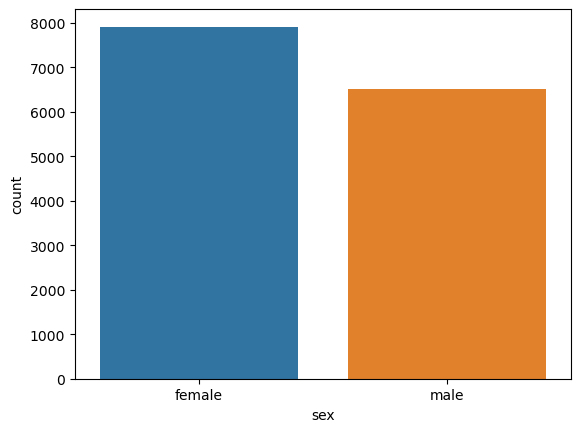

In [15]:
sns.countplot(data = welfare, x = 'sex')

### B.income :연속형변수

In [59]:
welfare['income'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14418 entries, 0 to 14417
Series name: income
Non-Null Count  Dtype  
--------------  -----  
4534 non-null   float64
dtypes: float64(1)
memory usage: 112.8 KB


In [17]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [18]:
welfare['income'].isnull().sum()

9884

<div style="background-color: red; padding: 20px;">
- 결측값이 9884개로 많은 편이므로 이 데이터에 대해서 결측처리를 해줘야한다.  
    - 코드 북을 참고하면 결측값은 9999 값으로 코딩했다고 하므로 9999에 해당하는 row를 nan처리 해주면 될것같다.
    하지만 9999값을 가진 row가 없으므로, 책의 코드 np.where로는 결측지를 잡아내지 못한다.    
    **isna.sum값이 0이 되야 결측 전처리가 된건데 이책의 코드는 계속9884가 뜬다**  
</div>

In [304]:
welfare['income']=np.where(welfare['income']==9999,np.nan,welfare['income'])
welfare['income'].isna().sum() 

9884

- 결측지를 제거했을때 분포보기

In [19]:
welfare.dropna(subset=['income'])

,sex,birth,marriage_type,religion,income,code_job,code_region
2,male,1942.0,3.0,1.0,107.0,762.0,1.0
3,male,1962.0,1.0,1.0,192.0,855.0,1.0
7,female,1934.0,1.0,1.0,27.0,941.0,1.0
8,female,1940.0,2.0,1.0,27.0,999.0,2.0
14,male,1978.0,1.0,2.0,338.0,312.0,1.0
...,...,...,...,...,...,...,...
14401,male,1966.0,1.0,1.0,280.0,874.0,6.0
14402,female,1962.0,1.0,1.0,209.0,930.0,6.0
14405,female,1947.0,2.0,2.0,27.0,941.0,6.0
14410,male,1956.0,1.0,1.0,200.0,854.0,6.0


<AxesSubplot:xlabel='income', ylabel='Count'>

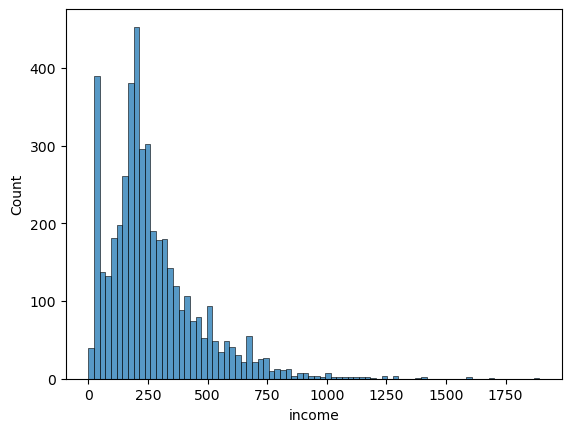

In [20]:
sns.histplot(data=welfare, x = 'income')

- fillna로 결측값을 50~3분위수 345 랜덤값으로 대체해서 채워주면서 현재 상황에서의 결측지 대체 문제 해결(이 경우가 최대한 위 그래프와 동일)

- 결측지를 제대로 처리하냐에따라 데이터 분석의 질과 머신러닝의 정확도가 확연히 달라지기 때문에 중요한부분이라고 생각!
    - 결국엔 결측지를 어떻게 처리하냐를 궁리하기위해 그래프로 분포를 보고 EDA를 함

In [64]:

raw_welfare = pd.read_spss('../Data/Koweps_hpwc14_2019_beta2.sav')
welfare = raw_welfare.copy()
welfare = welfare.rename(columns = {'h14_g3'     : 'sex',            #  성별
                                    'h14_g4'     : 'birth',          #  태어난 연도
                                    'h14_g10'    : 'marriage_type',  #  혼인 상태
                                    'h14_g11'    : 'religion',       #  종교 
                                    'p1402_8aq1' : 'income',         #  월급 
                                    'h14_eco9'   : 'code_job',       #  직업 코드
                                    'h14_reg7'   : 'code_region'})   #  지역 코드
welfare=welfare.loc[:,['sex','birth','marriage_type','religion','income','code_job','code_region']]
welfare.shape

(14418, 7)

**매번 같은 값의 랜덤분포가 나오게 seed변수 지정**

In [65]:
random.seed(42)
walfare_income_list=welfare['income'].apply(lambda x: np.random.randint(50, 350) if pd.isnull(x) else x)
welfare['income']=walfare_income_list
welfare['income'].isna().sum()

0

In [66]:
welfare['income'].head(20)

0     157.0
1     337.0
2     107.0
3     192.0
4     118.0
5     291.0
6      52.0
7      27.0
8      27.0
9     110.0
10     65.0
11    133.0
12     70.0
13    333.0
14    338.0
15    200.0
16    219.0
17    333.0
18    123.0
19    110.0
Name: income, dtype: float64

- 구간별 빈도수를 잘표현해 주는 히스토그램으로 income변수의 분포도 조사

<AxesSubplot:xlabel='income', ylabel='Count'>

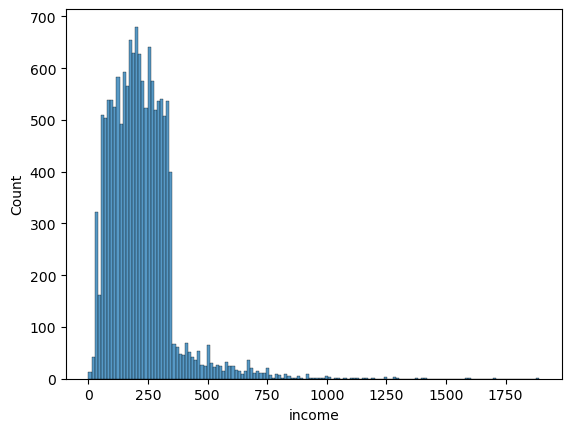

In [62]:
sns.histplot(data=welfare, x = 'income')

- 성별에 따른 월급 차이 분석
    - 평균 차이 분석

In [63]:
sex_income= welfare.groupby('sex',as_index=False) \
                   .agg(mean_income=('income','mean'))

sex_income

,sex,mean_income
0,female,194.944648
1,male,252.490699


### C.birth:연속형변수

In [28]:
welfare['birth'].dtypes

dtype('float64')

In [29]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

In [30]:
welfare['birth'].isnull().sum()

0

- 생년은 있는데 나이가 없으므로 현재 2024을 기준으로 해서 나이 컬럼을 추가해주자.

In [68]:
welfare=welfare.assign(age=2024-welfare['birth']+1)
welfare['age'].describe()

count    14418.000000
mean        55.719795
std         24.402250
min          7.000000
25%         35.000000
50%         57.000000
75%         77.000000
max        118.000000
Name: age, dtype: float64

### D.code_job: 명목형 변수

In [32]:
welfare['code_job'].value_counts()

611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: code_job, Length: 150, dtype: int64

In [33]:
welfare['code_job'].describe()

count    6878.00000
mean      587.54827
std       264.23507
min       111.00000
25%       313.00000
50%       611.00000
75%       873.00000
max      1009.00000
Name: code_job, dtype: float64

In [34]:
welfare['code_job'].isnull().sum()

7540

<div style="background-color: red; padding: 20px;">
명목형변수라 대체하기 애매하므로 결측지를 제거하는 형식으로 해야하지만,  
제거를 하게되면 제거된 row에 남아있는 다른 변수끼리 의 분석이 불가능하므로 새로운 view를 만들어서    
그때그때 제거하는 형식으로 진행    
</div>

In [ ]:
# welfare=welfare['code_job'].dropna()

- 직업코드표 엑셀파일을 import하고 merge 메소드를 이용해서 코드숫자와 직업명을 매치결합한다.(명목형 변수에 범주를 정해주는작업)

In [69]:
job_codeList=pd.read_excel('../Data/Koweps_Codebook_2019.xlsx',sheet_name='직종코드')
job_codeList

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자
...,...,...
151,992,계기∙자판기 및 주차 관리 종사자
152,999,기타 서비스 관련 단순 종사자
153,1001,장교
154,1002,부사관


- sql left조인 과 같은 결과 **JOIN=df.merge(join_table,join_case,join_condition)**
- 범주형으로 변환완료

In [70]:
welfare=welfare.merge(job_codeList,how='left',on='code_job')
welfare.head(10)


,sex,birth,marriage_type,religion,income,code_job,code_region,age,job
0,female,1945.0,2.0,1.0,157.0,NaN,1.0,80.0,NaN
1,male,1948.0,2.0,2.0,337.0,NaN,1.0,77.0,NaN
2,male,1942.0,3.0,1.0,107.0,762.0,1.0,83.0,전기공
3,male,1962.0,1.0,1.0,192.0,855.0,1.0,63.0,금속기계 부품 조립원
4,female,1963.0,1.0,1.0,118.0,NaN,1.0,62.0,NaN
5,female,2003.0,0.0,1.0,291.0,NaN,1.0,22.0,NaN
6,male,1927.0,1.0,1.0,52.0,NaN,1.0,98.0,NaN
7,female,1934.0,1.0,1.0,27.0,941.0,1.0,91.0,청소원 및 환경미화원
8,female,1940.0,2.0,1.0,27.0,999.0,2.0,85.0,기타 서비스 관련 단순 종사자
9,female,1970.0,3.0,1.0,110.0,NaN,1.0,55.0,NaN


--------------
### E.religion 명목형변수

In [37]:
welfare['religion'].dtypes

dtype('float64')

In [38]:
welfare['religion'].value_counts()

2.0    7815
1.0    6603
Name: religion, dtype: int64

- 변수 범주화

In [71]:
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')

welfare['religion'].value_counts()


no     7815
yes    6603
Name: religion, dtype: int64

In [72]:
welfare.head(10)

,sex,birth,marriage_type,religion,income,code_job,code_region,age,job
0,female,1945.0,2.0,yes,157.0,NaN,1.0,80.0,NaN
1,male,1948.0,2.0,no,337.0,NaN,1.0,77.0,NaN
2,male,1942.0,3.0,yes,107.0,762.0,1.0,83.0,전기공
3,male,1962.0,1.0,yes,192.0,855.0,1.0,63.0,금속기계 부품 조립원
4,female,1963.0,1.0,yes,118.0,NaN,1.0,62.0,NaN
5,female,2003.0,0.0,yes,291.0,NaN,1.0,22.0,NaN
6,male,1927.0,1.0,yes,52.0,NaN,1.0,98.0,NaN
7,female,1934.0,1.0,yes,27.0,941.0,1.0,91.0,청소원 및 환경미화원
8,female,1940.0,2.0,yes,27.0,999.0,2.0,85.0,기타 서비스 관련 단순 종사자
9,female,1970.0,3.0,yes,110.0,NaN,1.0,55.0,NaN


--------------
### F.marriage_type :명목형변수

In [41]:
welfare['marriage_type'].dtypes

dtype('float64')

In [73]:
welfare['marriage_type'].value_counts()

1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: marriage_type, dtype: int64

- 범주화 하기 (분석상 기혼/이혼 이 중요하므로 이거 위주로 범주화)

In [74]:
welfare['marriage_type'] = np.where(welfare['marriage_type'] == 1, 'marriage',
                      np.where(welfare['marriage_type'] == 3, 'divorce', 'etc'))

In [75]:
welfare.head(10)

,sex,birth,marriage_type,religion,income,code_job,code_region,age,job
0,female,1945.0,etc,yes,157.0,NaN,1.0,80.0,NaN
1,male,1948.0,etc,no,337.0,NaN,1.0,77.0,NaN
2,male,1942.0,divorce,yes,107.0,762.0,1.0,83.0,전기공
3,male,1962.0,marriage,yes,192.0,855.0,1.0,63.0,금속기계 부품 조립원
4,female,1963.0,marriage,yes,118.0,NaN,1.0,62.0,NaN
5,female,2003.0,etc,yes,291.0,NaN,1.0,22.0,NaN
6,male,1927.0,marriage,yes,52.0,NaN,1.0,98.0,NaN
7,female,1934.0,marriage,yes,27.0,941.0,1.0,91.0,청소원 및 환경미화원
8,female,1940.0,etc,yes,27.0,999.0,2.0,85.0,기타 서비스 관련 단순 종사자
9,female,1970.0,divorce,yes,110.0,NaN,1.0,55.0,NaN


-----------------
### G.region : 명목형 변수

In [76]:
welfare['code_region'].dtypes

dtype('float64')

In [77]:
welfare['code_region'].value_counts()

2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: code_region, dtype: int64

- 범주화 하기(코드목록 보고 dataframe만든뒤 merge이용)

In [78]:
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region'      : ['서울',
                                             '수도권(인천/경기)',
                                             '부산/경남/울산',
                                             '대구/경북',
                                             '대전/충남',
                                             '강원/충북',
                                             '광주/전남/전북/제주도']})
list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [79]:
welfare = welfare.merge(list_region, how = 'left', on = 'code_region')
welfare.head(10)

,sex,birth,marriage_type,religion,income,code_job,code_region,age,job,region
0,female,1945.0,etc,yes,157.0,NaN,1.0,80.0,NaN,서울
1,male,1948.0,etc,no,337.0,NaN,1.0,77.0,NaN,서울
2,male,1942.0,divorce,yes,107.0,762.0,1.0,83.0,전기공,서울
3,male,1962.0,marriage,yes,192.0,855.0,1.0,63.0,금속기계 부품 조립원,서울
4,female,1963.0,marriage,yes,118.0,NaN,1.0,62.0,NaN,서울
5,female,2003.0,etc,yes,291.0,NaN,1.0,22.0,NaN,서울
6,male,1927.0,marriage,yes,52.0,NaN,1.0,98.0,NaN,서울
7,female,1934.0,marriage,yes,27.0,941.0,1.0,91.0,청소원 및 환경미화원,서울
8,female,1940.0,etc,yes,27.0,999.0,2.0,85.0,기타 서비스 관련 단순 종사자,수도권(인천/경기)
9,female,1970.0,divorce,yes,110.0,NaN,1.0,55.0,NaN,서울


----------
### H.연령대 변수(age_category)설정 : 연속형 변수인 age변수를 명목형변수로 추가


<div style="background-color: red; padding: 20px;">
분위수 대로 25%, 50%, 75%로 연령별 급간을 설정하자. 'np.where 는 판다스 넘파이 의 조건문'
</div>

In [87]:
welfare['age'].describe()

count    14418.000000
mean        55.719795
std         24.402250
min          7.000000
25%         35.000000
50%         57.000000
75%         77.000000
max        118.000000
Name: age, dtype: float64

In [113]:
welfare=welfare.assign(age_category=np.where(welfare['age']<=35, 'YB(0~35)',
                                             np.where(welfare['age']<=77,'MB(36~77)','OB(77~)')))
welfare['age_category'].value_counts()

MB(36~77)    7238
YB(0~35)     3609
OB(77~)      3571
Name: age_category, dtype: int64

In [ ]:
welfare['age_category'].isnull().sum()

----
### I.보기쉽게 컬럼순서 조정

In [96]:
welfare.columns
welfare.rename(columns={'marriage_type':'marriage'},inplace=True)

In [114]:
welfare=welfare[['sex', 'birth', 'age', 'age_category', 'income','code_job' ,
      'job', 'marriage','religion' ,  'code_region','region']]
welfare.head(10)

,sex,birth,age,age_category,income,code_job,job,marriage,religion,code_region,region
0,female,1945.0,80.0,OB(77~),157.0,NaN,NaN,etc,yes,1.0,서울
1,male,1948.0,77.0,MB(36~77),337.0,NaN,NaN,etc,no,1.0,서울
2,male,1942.0,83.0,OB(77~),107.0,762.0,전기공,divorce,yes,1.0,서울
3,male,1962.0,63.0,MB(36~77),192.0,855.0,금속기계 부품 조립원,marriage,yes,1.0,서울
4,female,1963.0,62.0,MB(36~77),118.0,NaN,NaN,marriage,yes,1.0,서울
5,female,2003.0,22.0,YB(0~35),291.0,NaN,NaN,etc,yes,1.0,서울
6,male,1927.0,98.0,OB(77~),52.0,NaN,NaN,marriage,yes,1.0,서울
7,female,1934.0,91.0,OB(77~),27.0,941.0,청소원 및 환경미화원,marriage,yes,1.0,서울
8,female,1940.0,85.0,OB(77~),27.0,999.0,기타 서비스 관련 단순 종사자,etc,yes,2.0,수도권(인천/경기)
9,female,1970.0,55.0,MB(36~77),110.0,NaN,NaN,divorce,yes,1.0,서울


-----------
## 데이터 간 관계 세부 분석(세부 EDA)

### 나이,성별 과 월급관계 분석
    

    

- 나이별 월급(평균)

In [331]:
IncomeForAge=welfare.groupby('age',as_index=False) \
                    .agg(avg_income=('income','mean'))
                
IncomeForAge.tail(20)

,age,avg_income
82,89.0,170.854271
83,90.0,193.176471
84,91.0,182.717557
85,92.0,186.942857
86,93.0,176.702479
87,94.0,188.822785
88,95.0,191.107143
89,96.0,193.218750
90,97.0,177.600000
91,98.0,143.608696


<AxesSubplot:xlabel='age', ylabel='avg_income'>

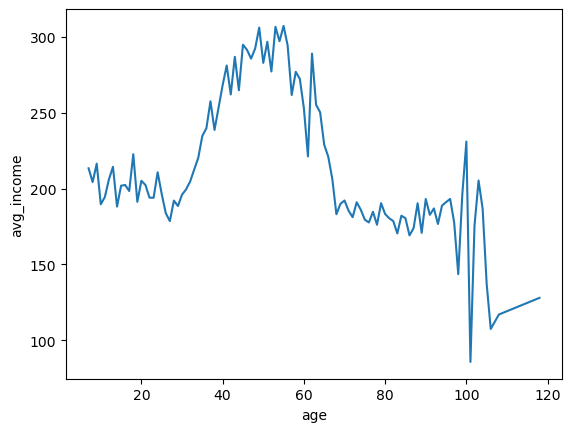

In [332]:
sns.lineplot(data=IncomeForAge,x='age',y='avg_income')

- 연령대 별 월급
    - 연령별 평균월급 구하기
    - 그래프로 나타내기

In [336]:
age_category_income=welfare.groupby('age_category',as_index=False) \
                           .agg(avg_income=('income','mean'))

age_category_income

,age_category,avg_income
0,MB,249.317905
1,OB,179.909549
2,YB,201.201995


<AxesSubplot:xlabel='age_category', ylabel='avg_income'>

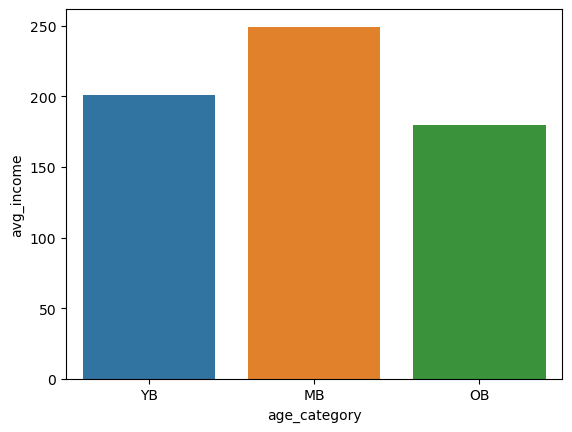

In [337]:
sns.barplot(data=age_category_income, x='age_category', y='avg_income',order=['YB','MB','OB'])

- 연령과 성별을 합쳐서 생각해보기
    - 비교
    - 차이
    

In [338]:
welfare.head(10)

,sex,birth,marriage_type,religion,income,code_job,code_region,age,age_category
0,female,1945.0,2.0,1.0,135.0,NaN,1.0,80.0,OB
1,male,1948.0,2.0,2.0,263.0,NaN,1.0,77.0,MB
2,male,1942.0,3.0,1.0,107.0,762.0,1.0,83.0,OB
3,male,1962.0,1.0,1.0,192.0,855.0,1.0,63.0,MB
4,female,1963.0,1.0,1.0,284.0,NaN,1.0,62.0,MB
5,female,2003.0,0.0,1.0,308.0,NaN,1.0,22.0,YB
6,male,1927.0,1.0,1.0,173.0,NaN,1.0,98.0,OB
7,female,1934.0,1.0,1.0,27.0,941.0,1.0,91.0,OB
8,female,1940.0,2.0,1.0,27.0,999.0,2.0,85.0,OB
9,female,1970.0,3.0,1.0,263.0,NaN,1.0,55.0,MB


In [342]:
AgeSex_income=welfare.groupby(['sex','age_category'],as_index=False) \
                     .agg(avg_income=('income','mean'))

AgeSex_income                    

,sex,age_category,avg_income
0,female,MB,202.876931
1,female,OB,177.622371
2,female,YB,197.773534
3,male,MB,301.192161
4,male,OB,183.735778
5,male,YB,204.844000


<AxesSubplot:xlabel='age_category', ylabel='avg_income'>

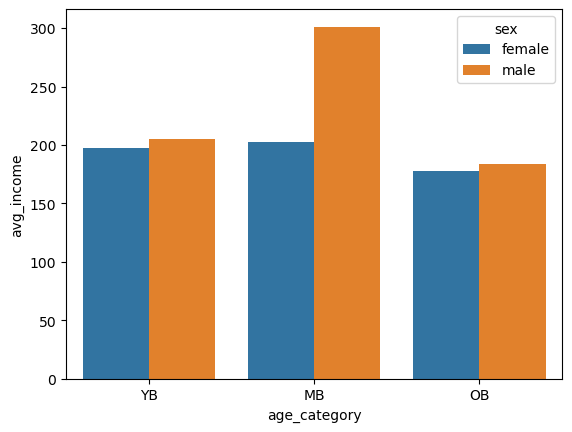

In [340]:
sns.barplot(data=AgeSex_income, x='age_category', y='avg_income', hue='sex', order=['YB','MB','OB'])

<AxesSubplot:xlabel='age', ylabel='income'>

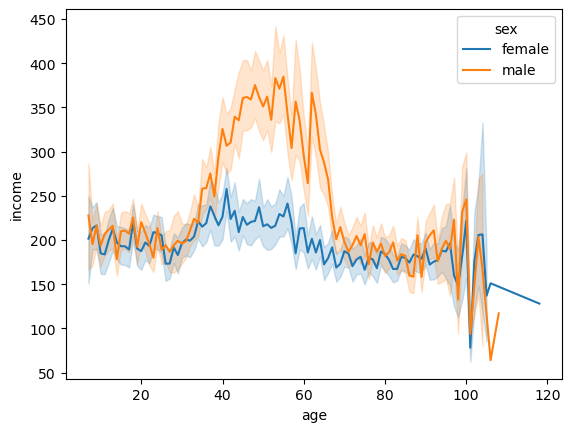

In [341]:
sns.lineplot(data=welfare, x='age', y='income', hue='sex')

----------
### 직업 과 월급의 관계 분석

- 직원별 월급 차이 분석하기
    - 월급이 제일많은 직업
    - 월급이 제일적은 직업

In [349]:
job_income=welfare.dropna(subset=['code_job']) \
                  .groupby('job', as_index=False) \
                  .agg(avg_income=('income','mean'))

job_income

,job,avg_income
0,가사 및 육아 도우미,114.804124
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,335.666667
3,건물 관리원 및 검표원,167.086420
4,건설 및 광업 단순 종사자,222.778846
...,...,...
145,화학∙고무 및 플라스틱 제품 생산기 조작원,452.714286
146,화학공학 기술자 및 시험원,489.500000
147,환경∙청소 및 경비 관련 관리자,214.642857
148,환경공학∙가스·에너지 기술자 및 시험원,511.000000


In [350]:
top10=job_income.sort_values('avg_income',ascending=False).head(10)
top10

,job,avg_income
63,보험 및 금융 관리자,689.230769
99,의료 진료 전문가,684.444444
24,기계∙로봇공학 기술자 및 시험원,629.303030
133,컴퓨터 하드웨어 및 통신공학 전문가,599.363636
142,행정 및 경영 지원 관리자,596.666667
60,법률 전문가,579.000000
110,장교,550.500000
77,소방∙방재 기술자 및 안전 관리원,524.687500
101,의회 의원∙고위 공무원 및 공공단체 임원,523.000000
121,제관원 및 판금원,514.200000


In [351]:
bottom10=job_income.sort_values('avg_income').head(10)
bottom10

,job,avg_income
34,기타 서비스 관련 단순 종사자,95.677419
129,청소원 및 환경미화원,99.639386
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,102.176471
141,학예사∙사서 및 기록물 관리사,114.666667
0,가사 및 육아 도우미,114.804124
43,돌봄 및 보건 서비스 종사자,121.335443
98,음식 관련 단순 종사자,133.478873
127,채굴 및 토목 관련 기능 종사자,140.000000
137,판매 관련 단순 종사자,155.366667
86,여행∙안내 및 접수 사무원,158.800000


In [91]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

<AxesSubplot:xlabel='avg_income', ylabel='job'>

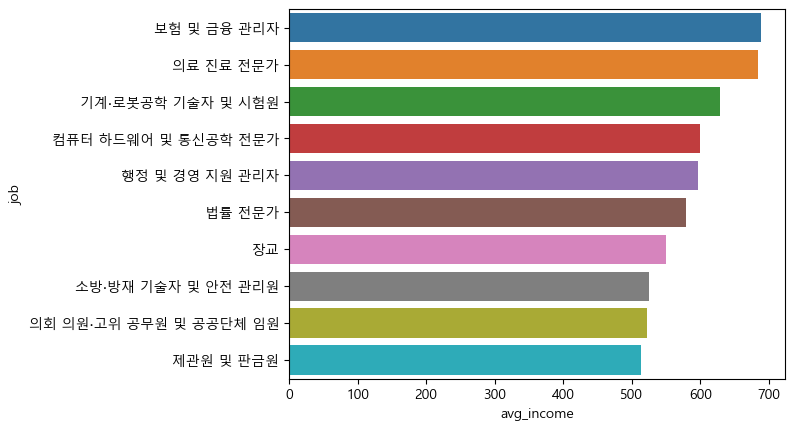

In [355]:
sns.barplot(data = top10, y = 'job', x = 'avg_income')

[(0.0, 800.0)]

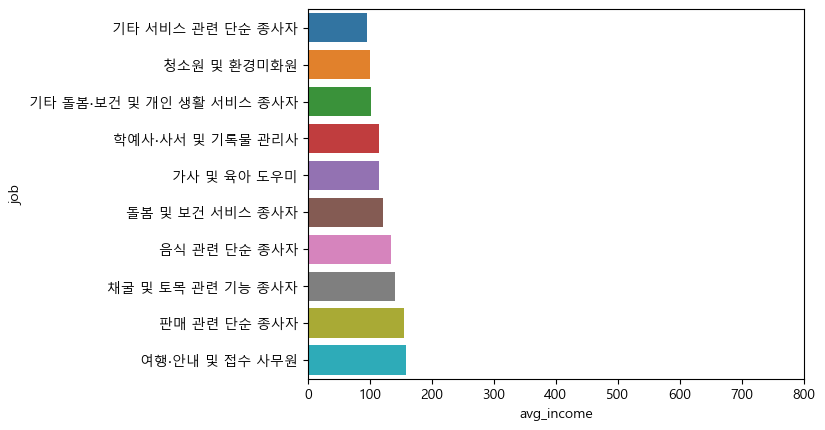

In [361]:
sns.barplot(data = bottom10, y = 'job', x = 'avg_income') \
   .set(xlim = [0, 800])

-----------------
### 성별 별 직업 빈도 분석

- 직업별 성별(수) 분포
    - 남자
    - 여자

In [89]:
male_job=welfare.dropna(subset=['code_job']) \
                .query('sex=="male"') \
                .groupby('job', as_index=False) \
                .agg(count=('job','count')) \
                .sort_values('count',ascending=False) \
                .head(10)

female_job=welfare.dropna(subset=['code_job']) \
                .query('sex=="female"') \
                .groupby('job', as_index=False) \
                .agg(count=('job','count')) \
                .sort_values('count',ascending=False) \
                .head(10)                

[(0.0, 500.0)]

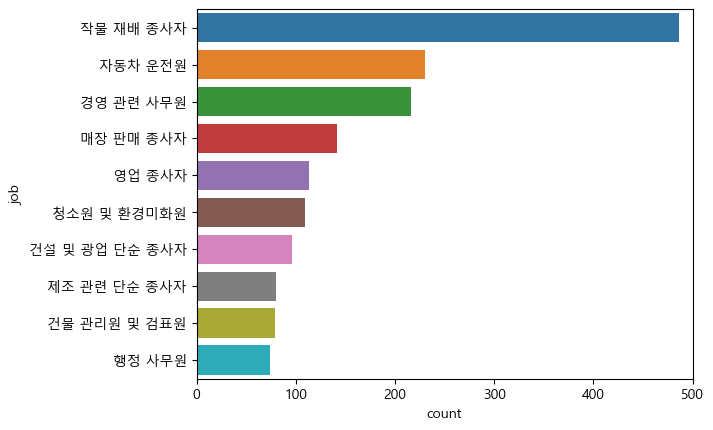

In [92]:
sns.barplot(data = male_job, y = 'job', x = 'count').set(xlim = [0, 500])

[(0.0, 500.0)]

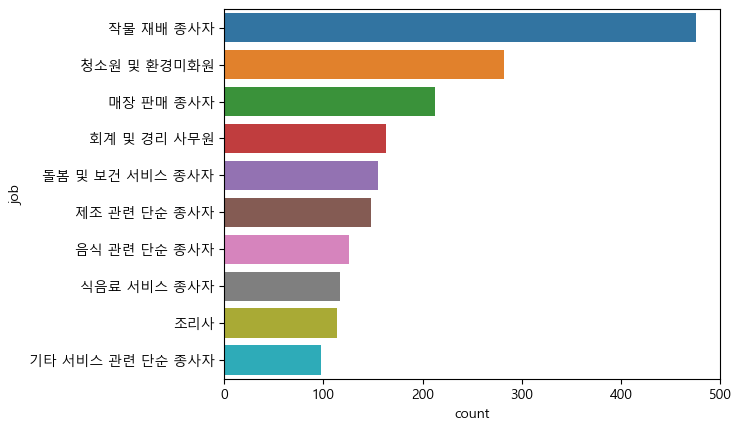

In [93]:
sns.barplot(data = female_job, y = 'job', x = 'count').set(xlim = [0, 500])

----------------
### 여러 종류 변수에 대한 이혼율 분석

- 종교 유무에 따른 이혼율 분석

In [100]:
rel_div = welfare.query('marriage != "etc"') \
                 .groupby('religion', as_index = False) \
                 ['marriage'] 
rel_div.value_counts()

,religion,marriage,count
0,no,marriage,3660
1,no,divorce,384
2,yes,marriage,3530
3,yes,divorce,305


In [102]:
# etc 제외(변수 이분화 혼인/이혼)
# religion로 그룹바이
# 그룹바이 /
# ['컬럼명']=> 그 컬럼만 추출
# 비율 구하기 => value_counts 파라미터 참조 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
# 그룹바이해서 컬럼명으로 하나의 series 타입을 만들엇기 때문에 value_counts 메소드르를 사용가능한것이다.
rel_div = welfare.query('marriage != "etc"') \
                 .groupby('religion', as_index = False) \
                 ['marriage'] \
                 .value_counts(normalize = True) # 해당갯수 / 전체변수갯수 => 이름은 proportion 이 default값
rel_div

,religion,marriage,proportion
0,no,marriage,0.905045
1,no,divorce,0.094955
2,yes,marriage,0.920469
3,yes,divorce,0.079531


In [123]:
rel_div = rel_div.query('marriage == "divorce"') \
                 .assign(proportion = rel_div['proportion'] * 100) \
                 .round(1)
rel_div.rename(columns={'proportion':'divorce_proportion'},inplace=True)

<AxesSubplot:xlabel='religion', ylabel='divorce_proportion'>

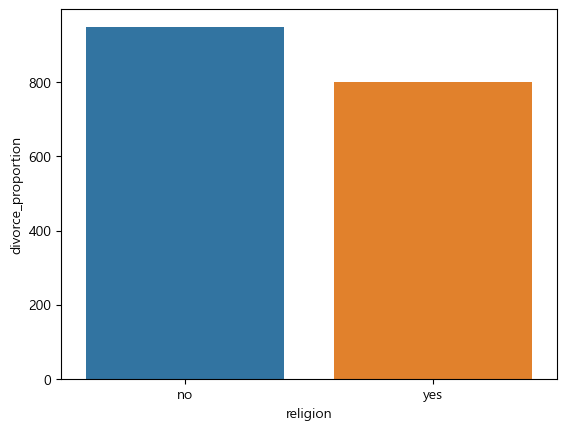

In [125]:
sns.barplot(data = rel_div, x = 'religion', y = 'divorce_proportion')

- 연령대 및 종교 유무에 따른 이혼율 분석

In [117]:
age_div=welfare.query('marriage != "etc"') \
       .groupby('age_category', as_index = False) \
       ['marriage'] \
       .value_counts(normalize=True)

age_div

,age_category,marriage,proportion
0,MB(36~77),marriage,0.899914
1,MB(36~77),divorce,0.100086
2,OB(77~),marriage,0.948039
3,OB(77~),divorce,0.051961
4,YB(0~35),marriage,0.962963
5,YB(0~35),divorce,0.037037


In [121]:
age_div = age_div.query('marriage == "divorce"') \
                 .assign(proportion = age_div['proportion'] * 100) \
                 .round(1)
age_div.rename(columns={'proportion':'divorce_proportion'},inplace=True)

<AxesSubplot:xlabel='age_category', ylabel='divorce_proportion'>

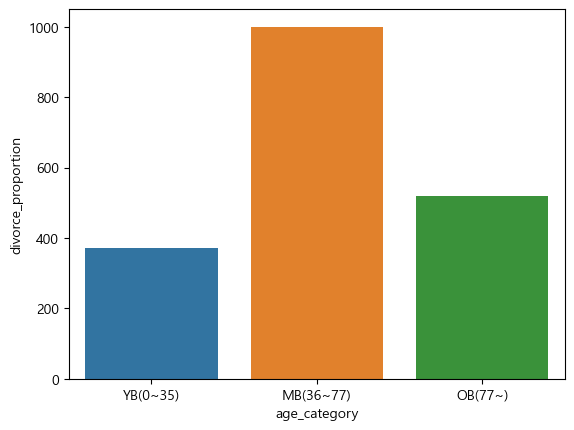

In [122]:
sns.barplot(data = age_div, x = 'age_category', y = 'divorce_proportion', order=['YB(0~35)','MB(36~77)','OB(77~)'])

- 연령대 및 종교 유무에 따른 이혼율

**이렇게 변수를 m:1로 비교할때 => Groupby로 다른변수 묶어주고, 비교할변수 1개를 ['컬럼명']으로 검색하는 느낌으로 코드를 작성해야한다**

In [135]:
age_rel_div_k = welfare.query('marriage != "etc"') \
                     .groupby(['age_category', 'religion'], as_index = False) \
                     ['marriage'] \
                     .value_counts(normalize = True)
           
age_rel_div_k

,age_category,religion,marriage,proportion
0,MB(36~77),no,marriage,0.893017
1,MB(36~77),no,divorce,0.106983
2,MB(36~77),yes,marriage,0.907851
3,MB(36~77),yes,divorce,0.092149
4,OB(77~),no,marriage,0.945853
5,OB(77~),no,divorce,0.054147
6,OB(77~),yes,marriage,0.949772
7,OB(77~),yes,divorce,0.050228
8,YB(0~35),no,marriage,0.944444
9,YB(0~35),no,divorce,0.055556


In [136]:
age_rel_div = age_rel_div_k.query('marriage == "divorce"') \
                         .assign(proportion = age_rel_div_k['proportion'] * 100) \
                         .round(1)
                         
age_rel_div.rename(columns={'proportion':'divorce_proportion'},inplace=True)

<AxesSubplot:xlabel='age_category', ylabel='divorce_proportion'>

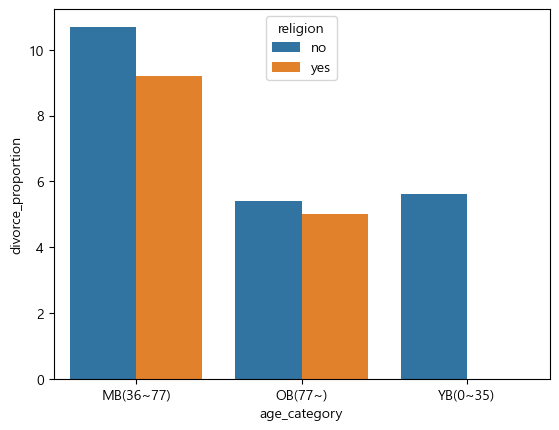

In [137]:
sns.barplot(data = age_rel_div, x = 'age_category', y = 'divorce_proportion', hue = 'religion')

**yb중 종교가 잇으면서 이혼한 사람이 한명도 없으므로 그래프가 안나온모습**

In [139]:
age_rel_div_k.iloc[10]

age_category    YB(0~35)
religion             yes
marriage        marriage
proportion           1.0
Name: 10, dtype: object

----------------
### 지역별 연령대 비율 - 어느 지역에 노년층이 많을까?

- 지역별 연령대 비율 분석

In [140]:
region_ageCategory = welfare.groupby('region', as_index = False) \
                     ['age_category'] \
                     .value_counts(normalize = True)
region_ageCategory

,region,age_category,proportion
0,강원/충북,MB(36~77),0.470536
1,강원/충북,OB(77~),0.289358
2,강원/충북,YB(0~35),0.240106
3,광주/전남/전북/제주도,MB(36~77),0.480941
4,광주/전남/전북/제주도,OB(77~),0.279400
5,광주/전남/전북/제주도,YB(0~35),0.239659
6,대구/경북,MB(36~77),0.469907
7,대구/경북,OB(77~),0.323495
8,대구/경북,YB(0~35),0.206597
9,대전/충남,MB(36~77),0.498203


In [141]:
region_ageCategory = region_ageCategory.assign(proportion = region_ageCategory['proportion'] * 100) \
                         .round(1)
region_ageCategory

,region,age_category,proportion
0,강원/충북,MB(36~77),47.1
1,강원/충북,OB(77~),28.9
2,강원/충북,YB(0~35),24.0
3,광주/전남/전북/제주도,MB(36~77),48.1
4,광주/전남/전북/제주도,OB(77~),27.9
5,광주/전남/전북/제주도,YB(0~35),24.0
6,대구/경북,MB(36~77),47.0
7,대구/경북,OB(77~),32.3
8,대구/경북,YB(0~35),20.7
9,대전/충남,MB(36~77),49.8


<AxesSubplot:xlabel='proportion', ylabel='region'>

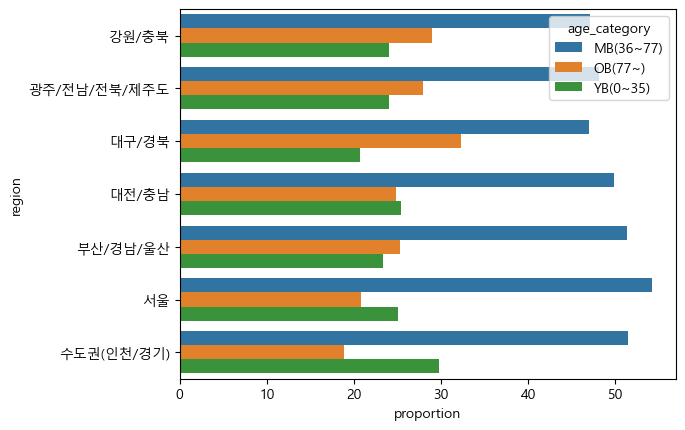

In [142]:
sns.barplot(data = region_ageCategory, y = 'region', x = 'proportion', hue = 'age_category')

- 누적 비율 막대 그래프 만들기
    - pivot
    - 그래프 플롯
    - sort 및 최종 pivot그래프 플롯

**pivot이란?

In [143]:
pivot_df = region_ageCategory[['region', 'age_category', 'proportion']].pivot(index   = 'region',
                                                               columns = 'age_category',
                                                               values  = 'proportion')
pivot_df

age_category,MB(36~77),OB(77~),YB(0~35)
region,,,
강원/충북,47.1,28.9,24.0
광주/전남/전북/제주도,48.1,27.9,24.0
대구/경북,47.0,32.3,20.7
대전/충남,49.8,24.8,25.4
부산/경남/울산,51.3,25.3,23.3
서울,54.2,20.8,25.0
수도권(인천/경기),51.4,18.9,29.7


<AxesSubplot:ylabel='region'>

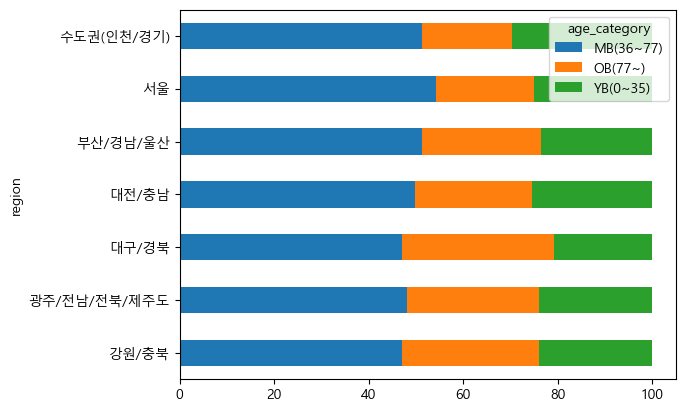

In [144]:
pivot_df.plot.barh(stacked = True)

In [145]:
reorder_df = pivot_df.sort_values('OB(77~)')[['YB(0~35)', 'MB(36~77)', 'OB(77~)']]
reorder_df

age_category,YB(0~35),MB(36~77),OB(77~)
region,,,
수도권(인천/경기),29.7,51.4,18.9
서울,25.0,54.2,20.8
대전/충남,25.4,49.8,24.8
부산/경남/울산,23.3,51.3,25.3
광주/전남/전북/제주도,24.0,48.1,27.9
강원/충북,24.0,47.1,28.9
대구/경북,20.7,47.0,32.3


<AxesSubplot:ylabel='region'>

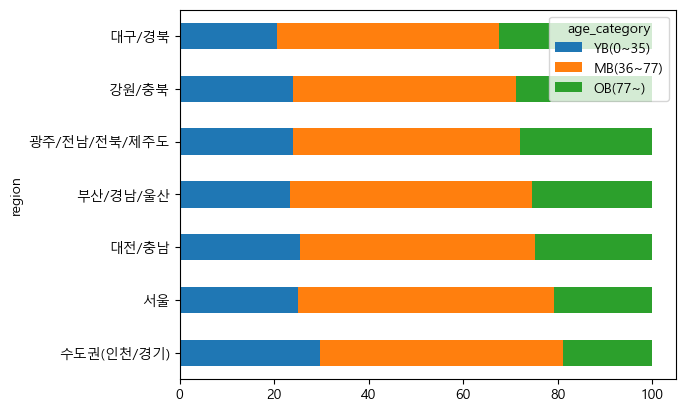

In [146]:
reorder_df.plot.barh(stacked = True)